## House Price Predictions by using Machine Learning Model XGB Regressor

In [1]:
#import the dedependencies 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Import the Boston House Price Dataset

import sklearn.datasets

house_prices = sklearn.datasets.load_boston()

In [4]:
house_prices

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

## Our boston data is in dictionary, let's convert into the DataFrame by using Pandas 

In [11]:
house_price_df = pd.DataFrame(house_prices.data, columns = house_prices.feature_names )

In [13]:
house_price_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Description of the Boston Dataset

 There are 14 attributes in each case of the dataset. They are:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes

In [15]:
## add the target column to the dataframe 
house_price_df['Price'] = house_prices.target

In [16]:
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
## Checking the number of row and columns in the dataframe

house_price_df.shape

(506, 14)

In [18]:
#check the missing values 

house_price_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [19]:
## Statistical measures of the dataset 

house_price_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation 

measure whether or not there is a relationship between two variables.

1. Positive Correlation
2. Negative Correlation

In [36]:
house_price_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


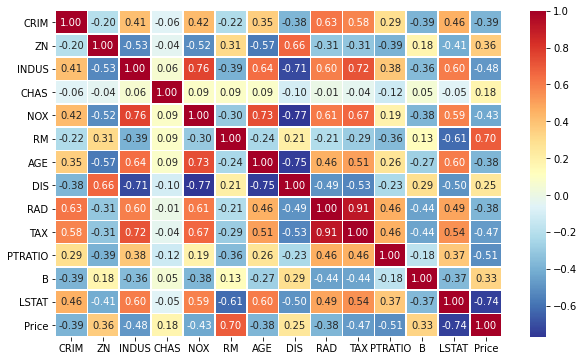

In [41]:
## Plot the correlation metrics 

corr_matrix = house_price_df.corr()

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth = 0.5,
                 fmt='.2f',
                 cmap='RdYlBu_r')

## Splitting the Data and Target 

In [42]:
X = house_price_df.drop('Price', axis=1)
y = house_price_df['Price']

In [43]:
X 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [44]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

## Training and Splitting the Data 

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## Build a Machine Learning 

#### In this dataset we are using the XGBoost Regressor to predict the House prices .

In [49]:
#import the model

from xgboost import XGBRegressor

model = XGBRegressor()

In [50]:
model.fit(X_train, y_train)

[13:23:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [51]:
model.score(X_test, y_test)

0.9001688181972534

## Evaluation

Prediction on training Data 


In [55]:
## Precitions on the training data 

training_data_preds = model.predict(X_train)

In [56]:
training_data_preds

array([23.268766 , 48.80873  ,  9.183765 , 23.43446  , 14.652068 ,
       11.344117 , 31.526611 ,  7.8360634, 29.336159 , 34.429844 ,
       47.627575 , 20.071611 , 18.85502  , 15.142076 , 14.5824995,
       13.329948 , 14.428923 , 17.654026 , 30.361177 , 31.36224  ,
       24.481388 , 12.550448 , 21.165295 , 14.574323 , 22.026215 ,
       31.761902 , 35.44674  , 30.816109 , 23.23294  , 18.298914 ,
       48.29879  , 20.359129 , 20.394554 , 13.895344 , 14.369615 ,
       24.29995  , 15.888082 , 13.092379 , 19.16313  , 21.70458  ,
       18.95964  , 12.053484 , 24.994707 , 25.231688 , 14.0361185,
       20.175335 , 16.333397 , 23.443674 , 18.314854 , 15.406754 ,
       22.849112 , 25.87228  , 17.670263 , 23.675611 , 20.944645 ,
       18.853619 , 22.25095  , 21.757788 , 16.5224   , 11.153109 ,
       24.537039 , 24.380548 , 34.88536  , 20.756058 , 20.66012  ,
       29.155264 ,  9.453925 , 16.291718 , 14.977815 , 35.958344 ,
       17.453417 , 26.256666 , 22.752792 , 19.972427 , 16.6496

In [66]:
len(training_data_preds)

404

In [69]:
## Let's find the difference 

differ = training_data_preds - y_train

In [70]:
differ

504    1.268766
225   -1.191269
419    0.783765
360   -1.565540
149   -0.747932
         ...   
45     1.718700
421    0.807374
484   -0.258155
170    2.241781
447    3.090053
Name: Price, Length: 404, dtype: float64

In [71]:
Predicted_price = pd.concat([pd.Series(training_data_preds), pd.Series(y_train), pd.Series(differ)], axis=1)
Predicted_price.columns = ['Predictions', 'Original Price', 'Difference']

In [72]:
Predicted_price

,Predictions,Original Price,Difference
0,23.268766,24.0,2.260515
1,48.808731,21.6,0.533276
2,9.183765,NaN,NaN
3,23.434460,NaN,NaN
4,14.652068,36.2,-0.753261
...,...,...,...
501,NaN,22.4,-0.149050
502,NaN,20.6,-1.336481
503,NaN,23.9,0.619405
504,NaN,22.0,1.268766


In [73]:
Predicted_price.isna().sum()

Predictions       80
Original Price    80
Difference        80
dtype: int64

In [74]:
Predicted_price.fillna(0, inplace=True)

In [75]:
Predicted_price

,Predictions,Original Price,Difference
0,23.268766,24.0,2.260515
1,48.808731,21.6,0.533276
2,9.183765,0.0,0.000000
3,23.434460,0.0,0.000000
4,14.652068,36.2,-0.753261
...,...,...,...
501,0.000000,22.4,-0.149050
502,0.000000,20.6,-1.336481
503,0.000000,23.9,0.619405
504,0.000000,22.0,1.268766


In [80]:
#Export the pridicted Price 

Predicted_price.to_csv('Predicted House Prices.csv')

## let's Do some other evaluations to get a good score

In [91]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error

In [92]:
# R squared Error 

score_1 = metrics.r2_score(y_train, training_data_preds)

In [93]:
# Mean absolute error 
score_2 = metrics.mean_absolute_error(y_train, training_data_preds)

In [95]:
print('R Squared error :' , score_1)
print('Mean Absolute Error:', score_2)

R Squared error : 0.9719545228015823
Mean Absolute Error: 1.1293056835042368


## Predictions on the Test Data 

In [97]:
test_data_preds = model.predict(X_test)

In [98]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
269,0.09065,20.0,6.96,1.0,0.464,5.920,61.5,3.9175,3.0,223.0,18.6,391.34,13.65
397,7.67202,0.0,18.10,0.0,0.693,5.747,98.9,1.6334,24.0,666.0,20.2,393.10,19.92
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92
291,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56
246,0.33983,22.0,5.86,0.0,0.431,6.108,34.9,8.0555,7.0,330.0,19.1,390.18,9.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01
152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12
90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81


In [99]:
differ = test_data_preds- y_test

In [100]:
differ

269    2.426945
397    5.137831
162   -5.454975
291   -3.780057
246   -2.065934
         ...   
414    4.255177
493   -0.863337
152    4.862834
90     1.414433
167   -3.772534
Name: Price, Length: 102, dtype: float64